## Capstone project - Crop prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency, ttest_ind, f_oneway

import os
import time
import warnings
warnings.filterwarnings('ignore')

**Reading datasets into dataframe**

In [3]:
df_crop=pd.read_csv(r'Z:\Capstone-cropwise\artifacts\Optimizing Agriculture Production.csv')

## Descriptive statistic

➔ Temperature, Humidity, Rainfall.

➔ The dataset also consists of soil conditions required to grow the crops

➔ N: The Ratio of Nitrogen Content in Soil.

➔ P: The Ratio of Phosphorus Content in Soil.

➔ K: The Ratio of Potassium Content in Soil.

➔ pH: pH of the Soil

In [4]:
df_crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df_crop.shape

(2200, 8)

In [5]:
# df_crop.label = df_crop.label.astype('category')

In [6]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df_crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df_crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Checking crop count in dataset

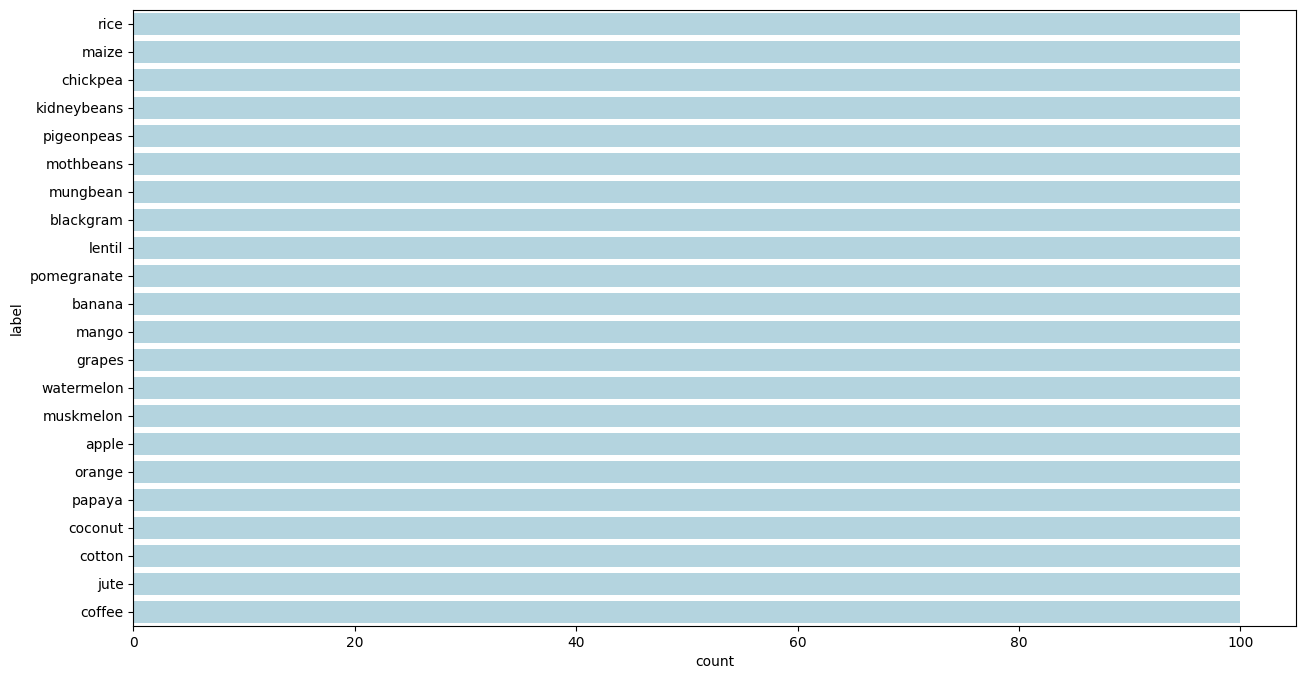

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(y='label', data=df_crop, color='lightblue')  # Specify the palette here
plt.show()

we see count's are distributed same for all crops

# Checking outliers

In [10]:
columns=df_crop.columns
columns=columns[:-1] #exculding label(category) column

------------------------------------------------------------------------------------------------------------------------


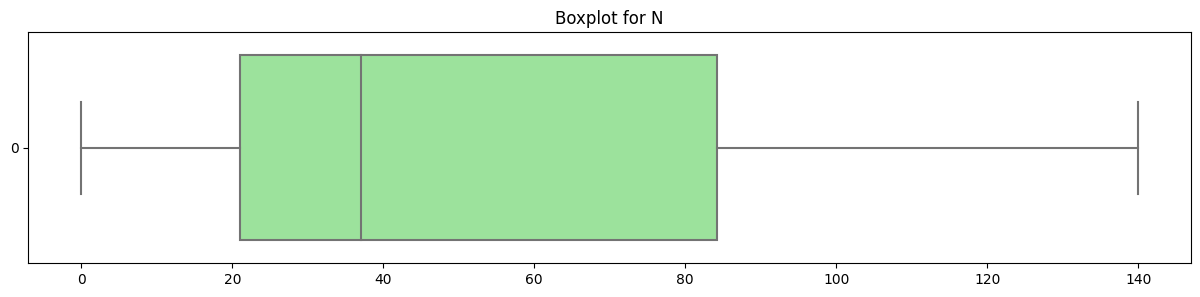

------------------------------------------------------------------------------------------------------------------------


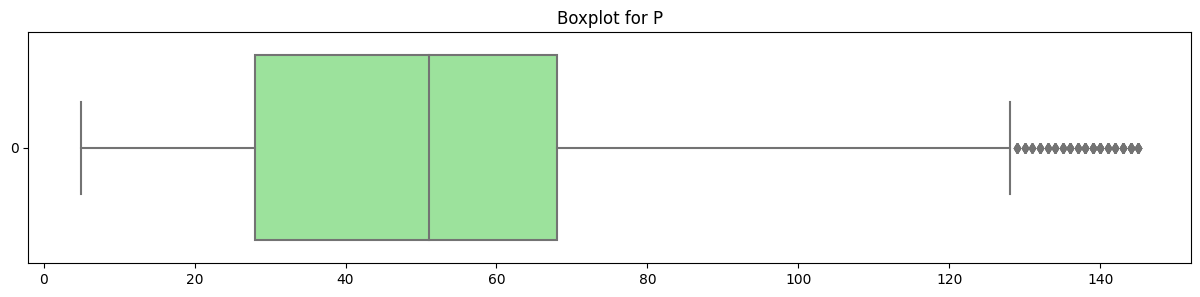

------------------------------------------------------------------------------------------------------------------------


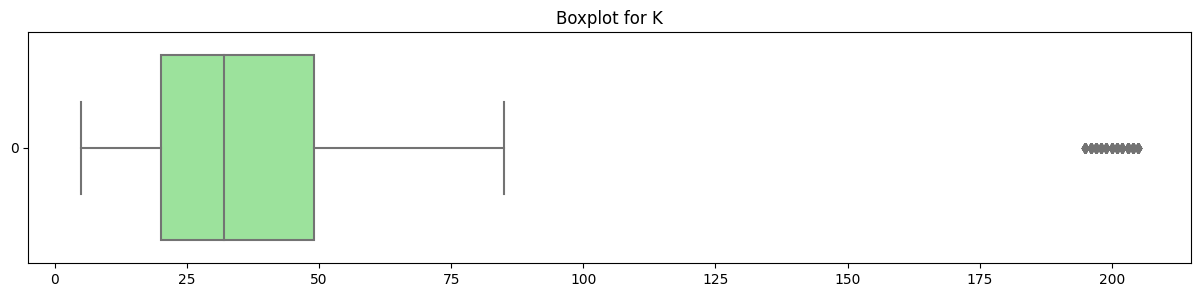

------------------------------------------------------------------------------------------------------------------------


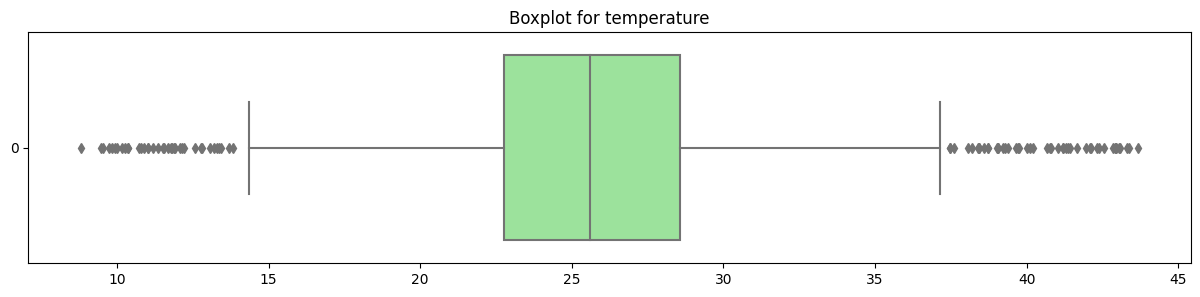

------------------------------------------------------------------------------------------------------------------------


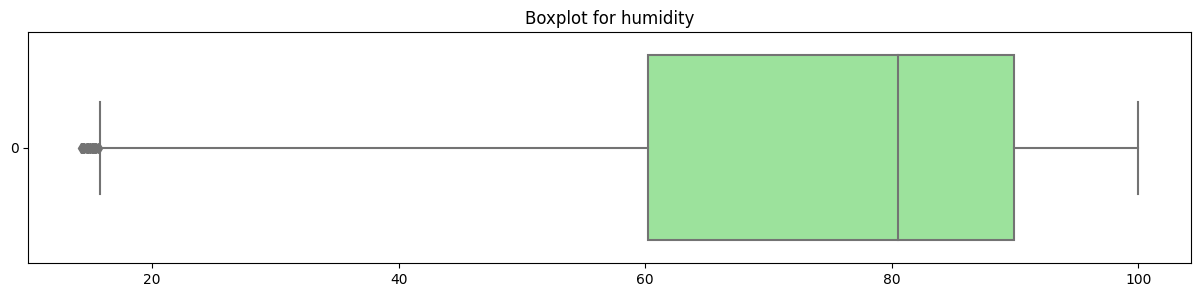

------------------------------------------------------------------------------------------------------------------------


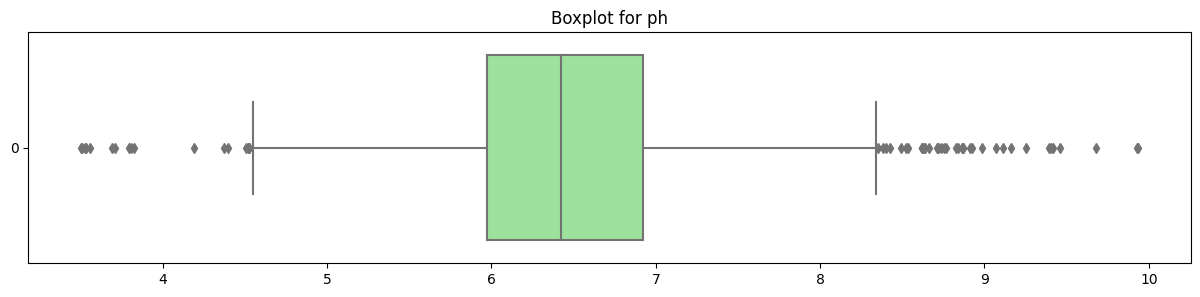

------------------------------------------------------------------------------------------------------------------------


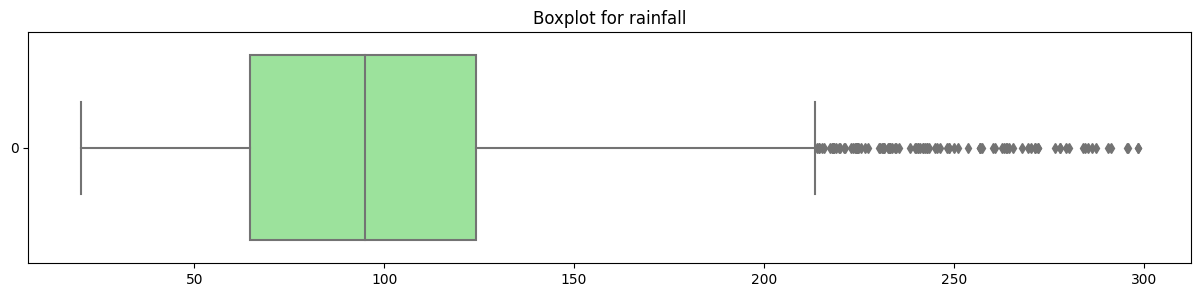

In [11]:
for col in columns:
    plt.figure(figsize=(15,3))
    plt.title(f'Boxplot for {col}')
    sns.boxplot(df_crop[col] , orient='h',color='lightgreen')
    print('------'*20)
    plt.show()

Analyzing the outliers based on each crops

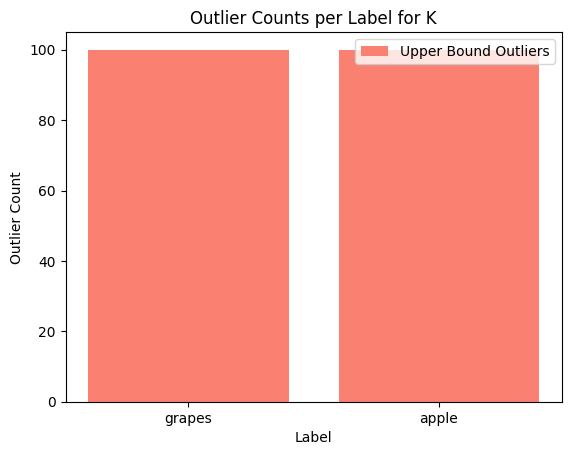

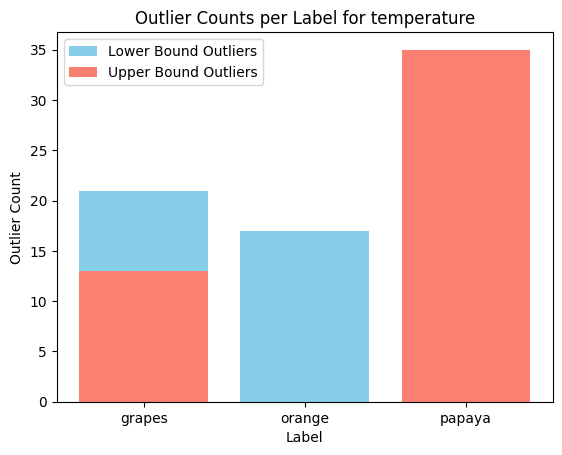

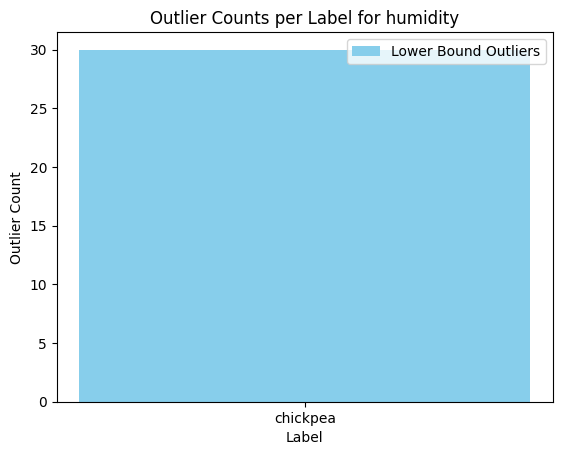

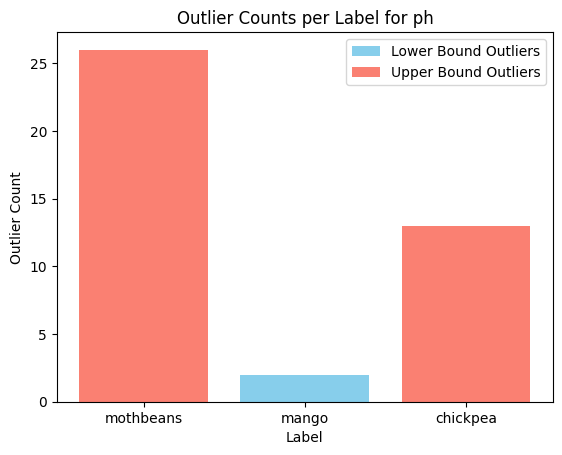

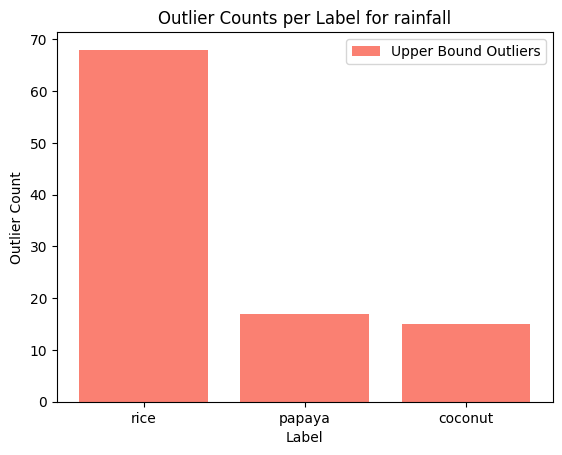

In [12]:
columns=columns[2:] # we removed attribute 'N' as we observed 0 outliers
for col in columns:
    q1 = df_crop[col].quantile(0.25)
    q3 = df_crop[col].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    
    outliers_lb = df_crop[df_crop[col] < lb]
    outliers_ub = df_crop[df_crop[col] > ub]
    
    outlier_counts_lb = outliers_lb['label'].value_counts()
    outlier_counts_ub = outliers_ub['label'].value_counts()
    
    outlier_counts_lb = outlier_counts_lb[outlier_counts_lb != 0]  
    outlier_counts_ub = outlier_counts_ub[outlier_counts_ub != 0] 
    
    if not outlier_counts_lb.empty:
        plt.bar(outlier_counts_lb.index, outlier_counts_lb.values, color='skyblue', label='Lower Bound Outliers')
    
    if not outlier_counts_ub.empty:
        plt.bar(outlier_counts_ub.index, outlier_counts_ub.values, color='salmon', label='Upper Bound Outliers')
    
    plt.xlabel('Label')
    plt.ylabel('Outlier Count')
    plt.title(f'Outlier Counts per Label for {col}')
    plt.legend()
    plt.show()

- add points on outliers
- we also find out patterns

# checking data distribution

<Figure size 1500x300 with 0 Axes>

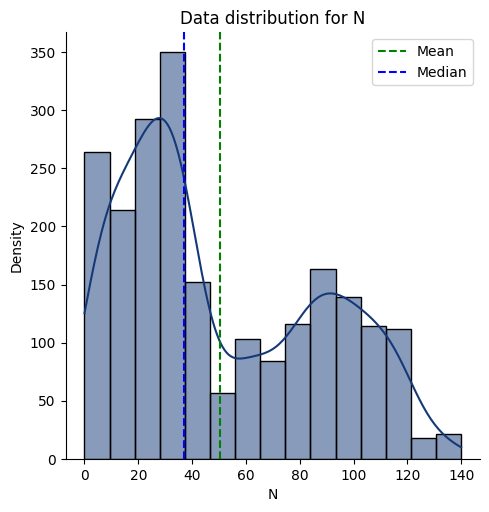

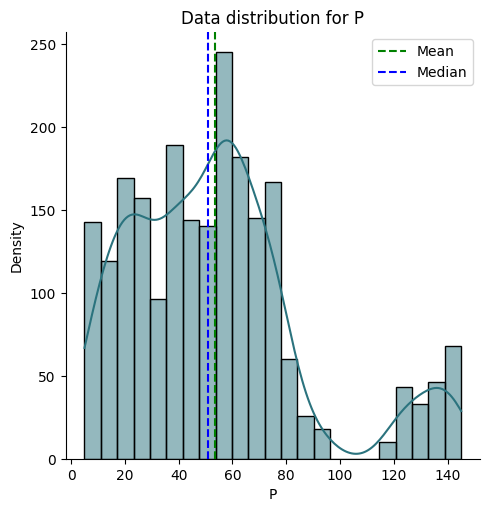

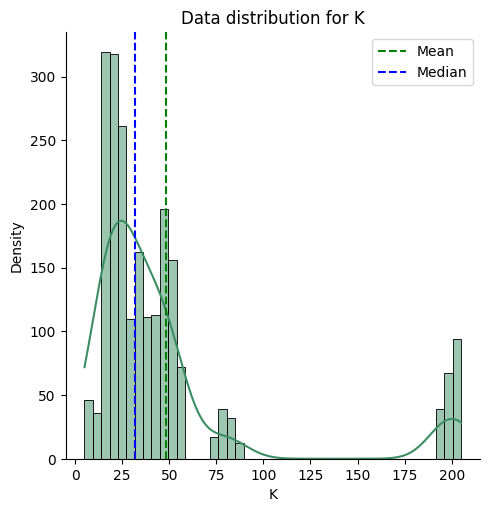

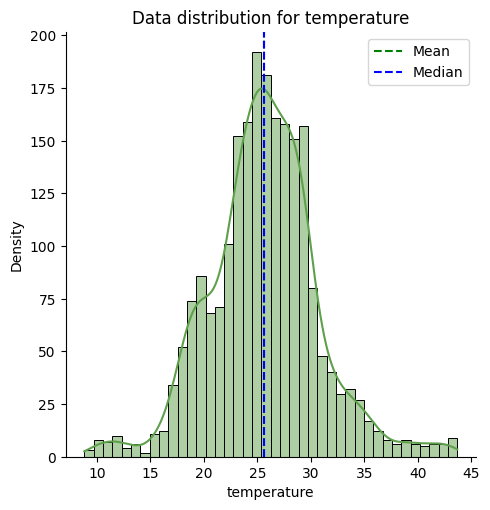

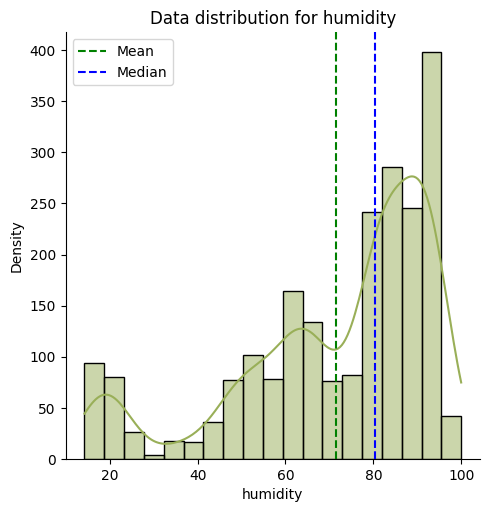

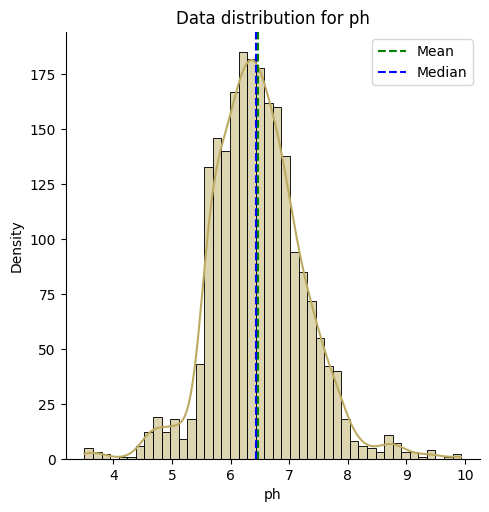

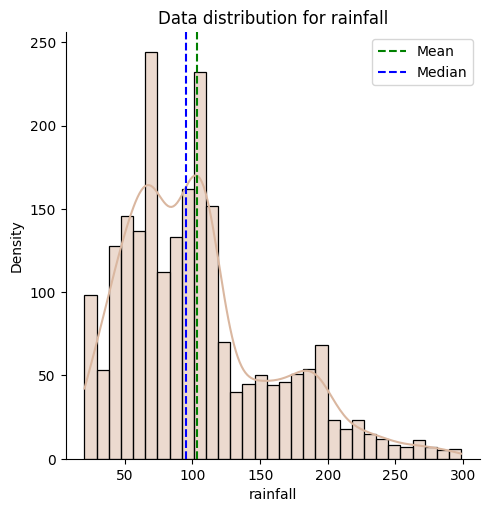

In [13]:
columns=df_crop.columns
columns=columns[:-1] 
palette = sns.color_palette("gist_earth", len(columns))
plt.figure(figsize=(15,3))
for i, col in enumerate(columns):
    sns.displot(df_crop[col], kde=True, color=palette[i])
    plt.xlabel(col) 
    plt.ylabel('Density')
    plt.title(f'Data distribution for {col}')
    plt.axvline(df_crop[col].mean(), c='green', ls='--', label='Mean')
    plt.axvline(df_crop[col].median(), c='blue', ls='--', label='Median')
    plt.legend()
    plt.show()

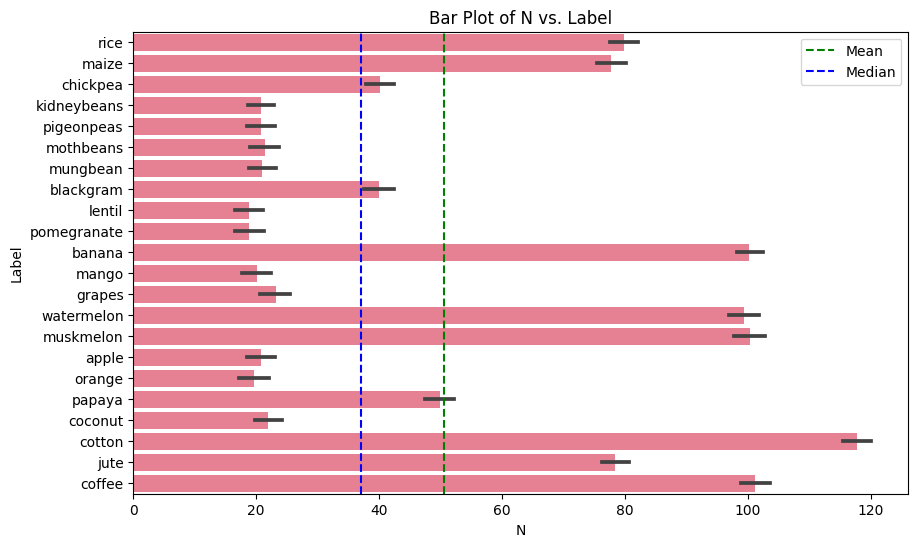

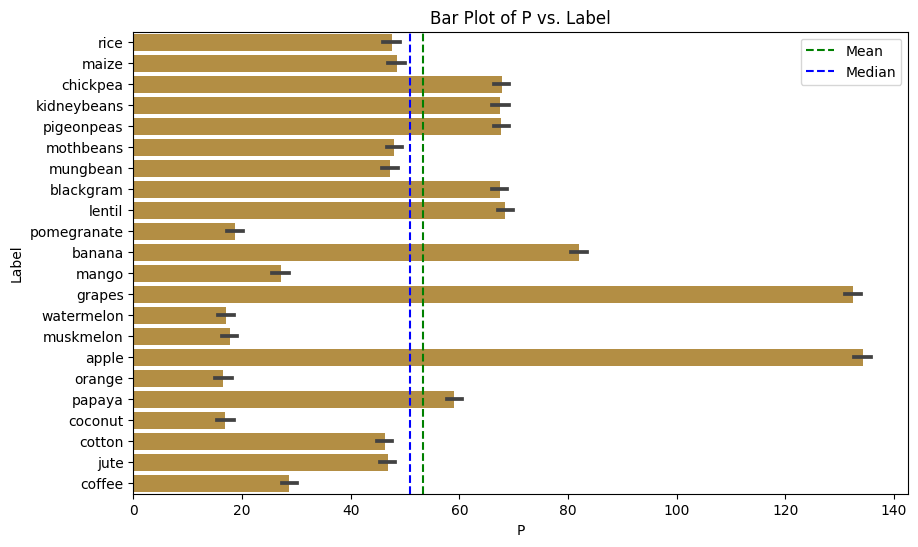

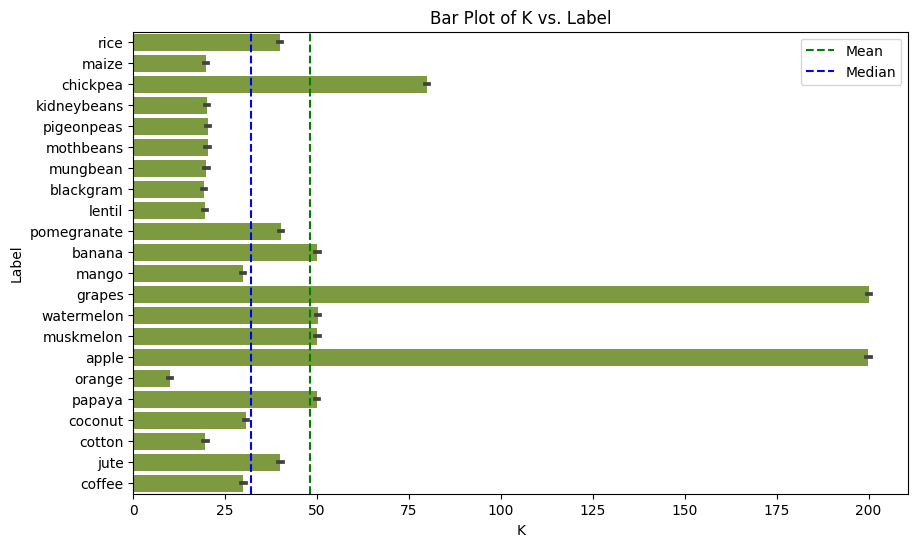

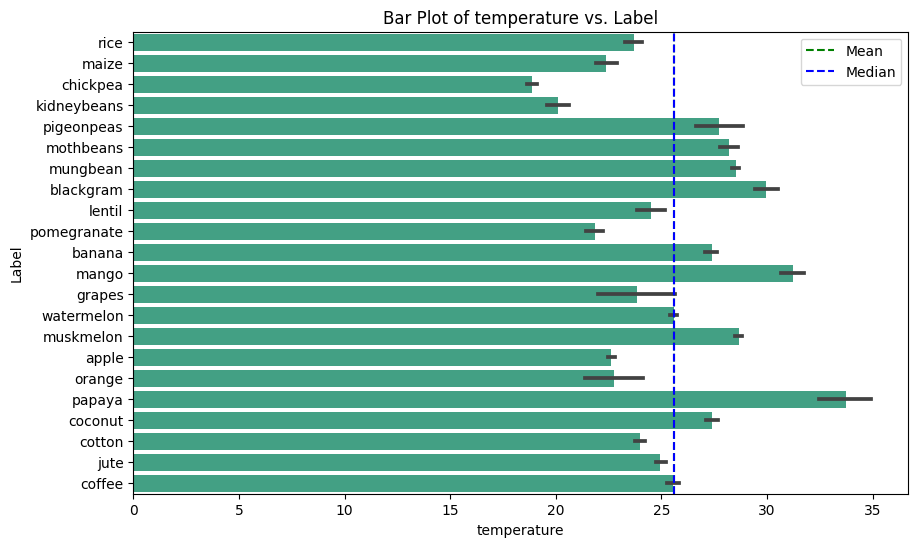

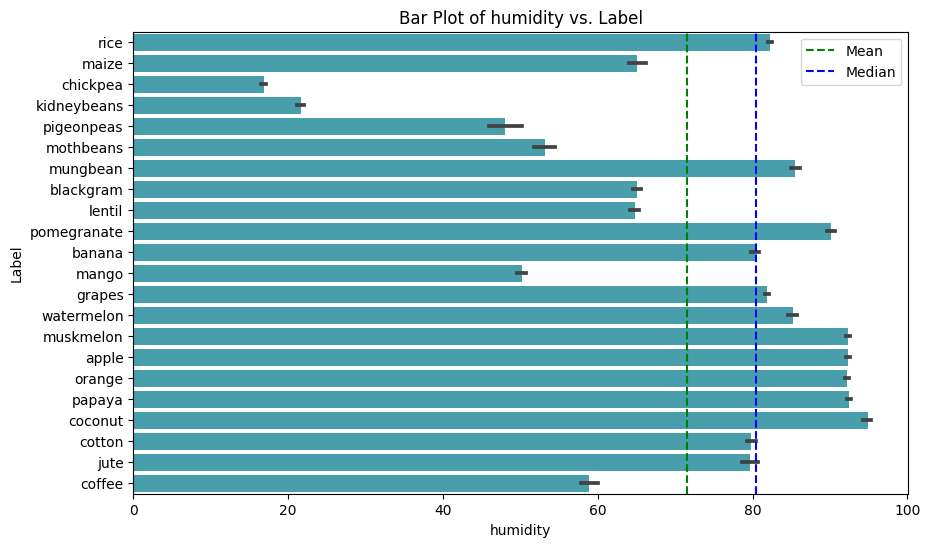

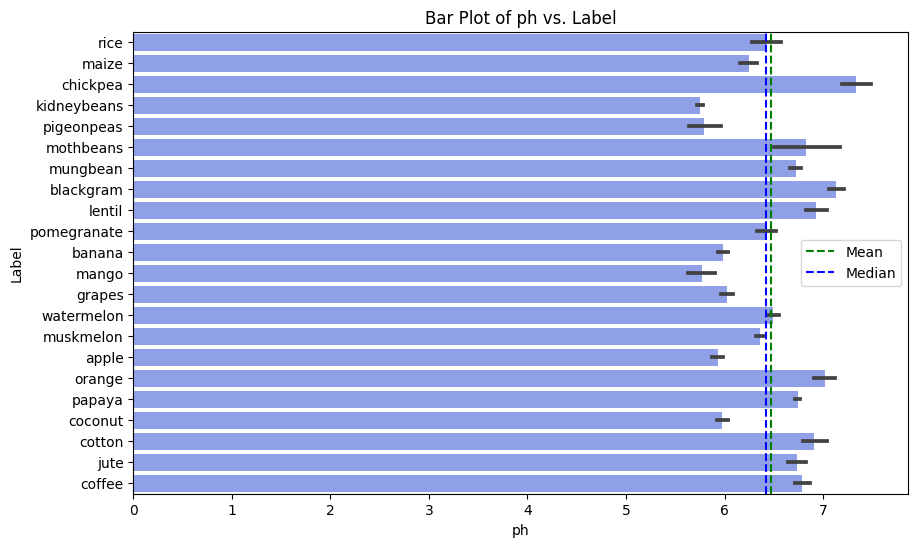

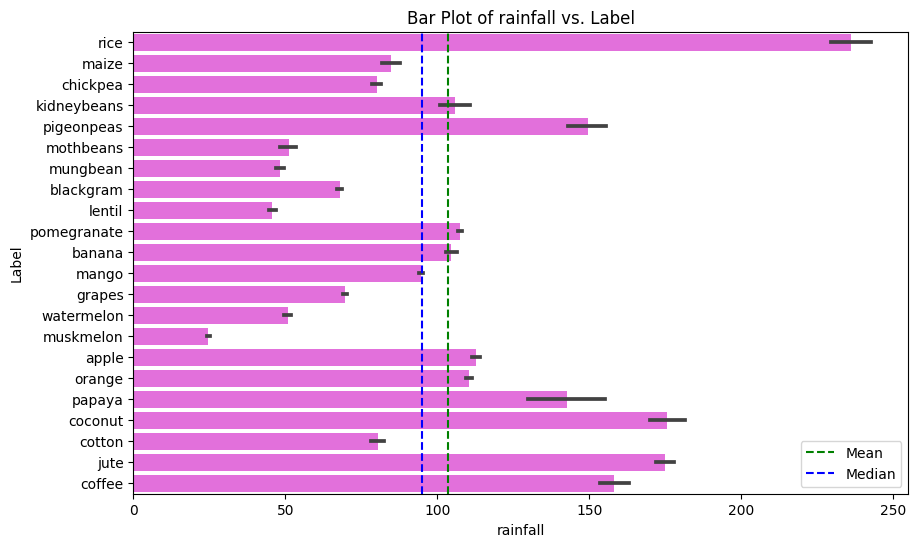

In [14]:
columns=df_crop.columns
columns=columns[:-1] 
palette = sns.color_palette("husl", len(columns))  
for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6)) 
    sns.barplot(data=df_crop, x=col, y='label', color=palette[i])
    plt.title(f'Bar Plot of {col} vs. Label')
    plt.xlabel(col)
    plt.axvline(df_crop[col].mean(), c='green', ls='--', label='Mean')
    plt.axvline(df_crop[col].median(), c='blue', ls='--', label='Median')
    plt.legend()
    plt.ylabel('Label')
    plt.show()

In [15]:
corr=df_crop.corr(numeric_only=True)

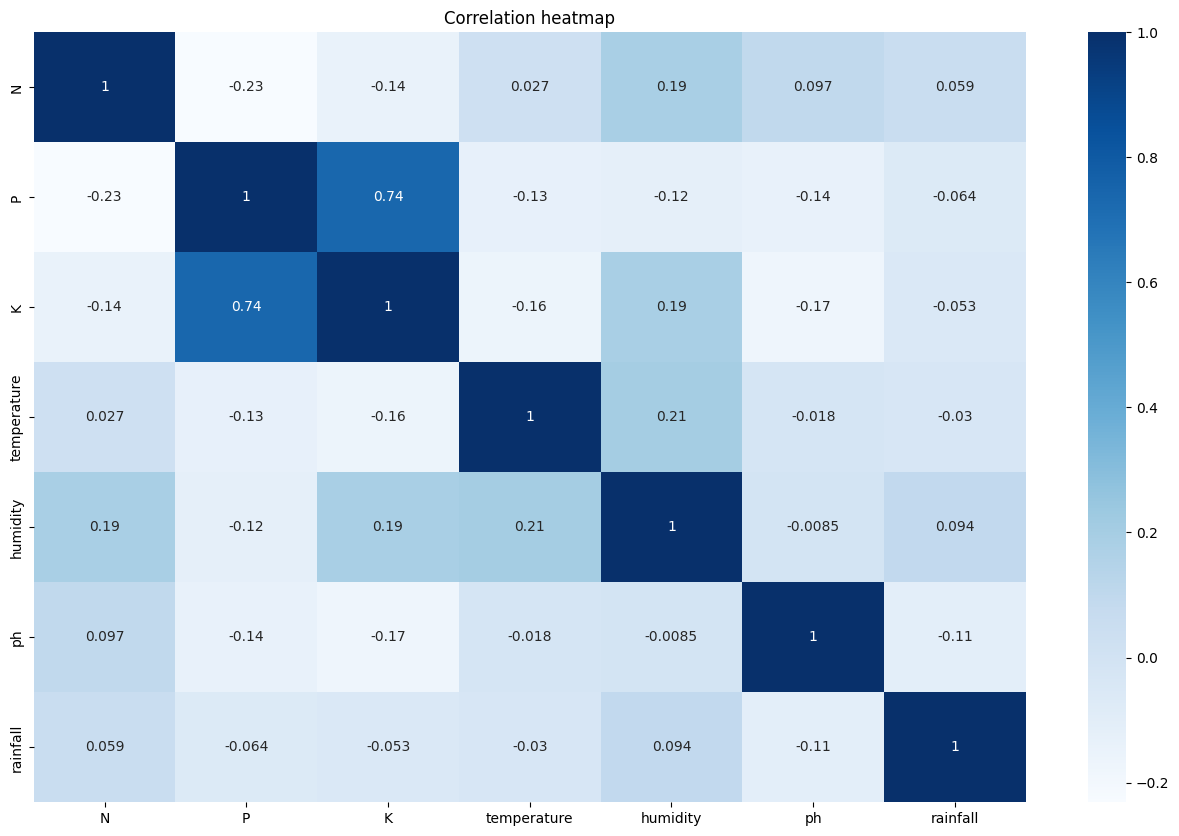

In [16]:
plt.figure(figsize=(16,10))

sns.heatmap(corr ,annot=True , cmap="Blues")
plt.title('Correlation heatmap')
plt.show()

- The strong positive correlation of 0.736 between Phosphorus (P) and Potassium (K) suggests a significant relationship between these two soil nutrients, which is crucial in agricultural practices and plant growth.

- The weak negative correlation of -0.063839 between Phosphorus (P) and Rainfall suggests a minor inverse relationship, indicating that higher phosphorus levels may be associated with lower rainfall conditions.


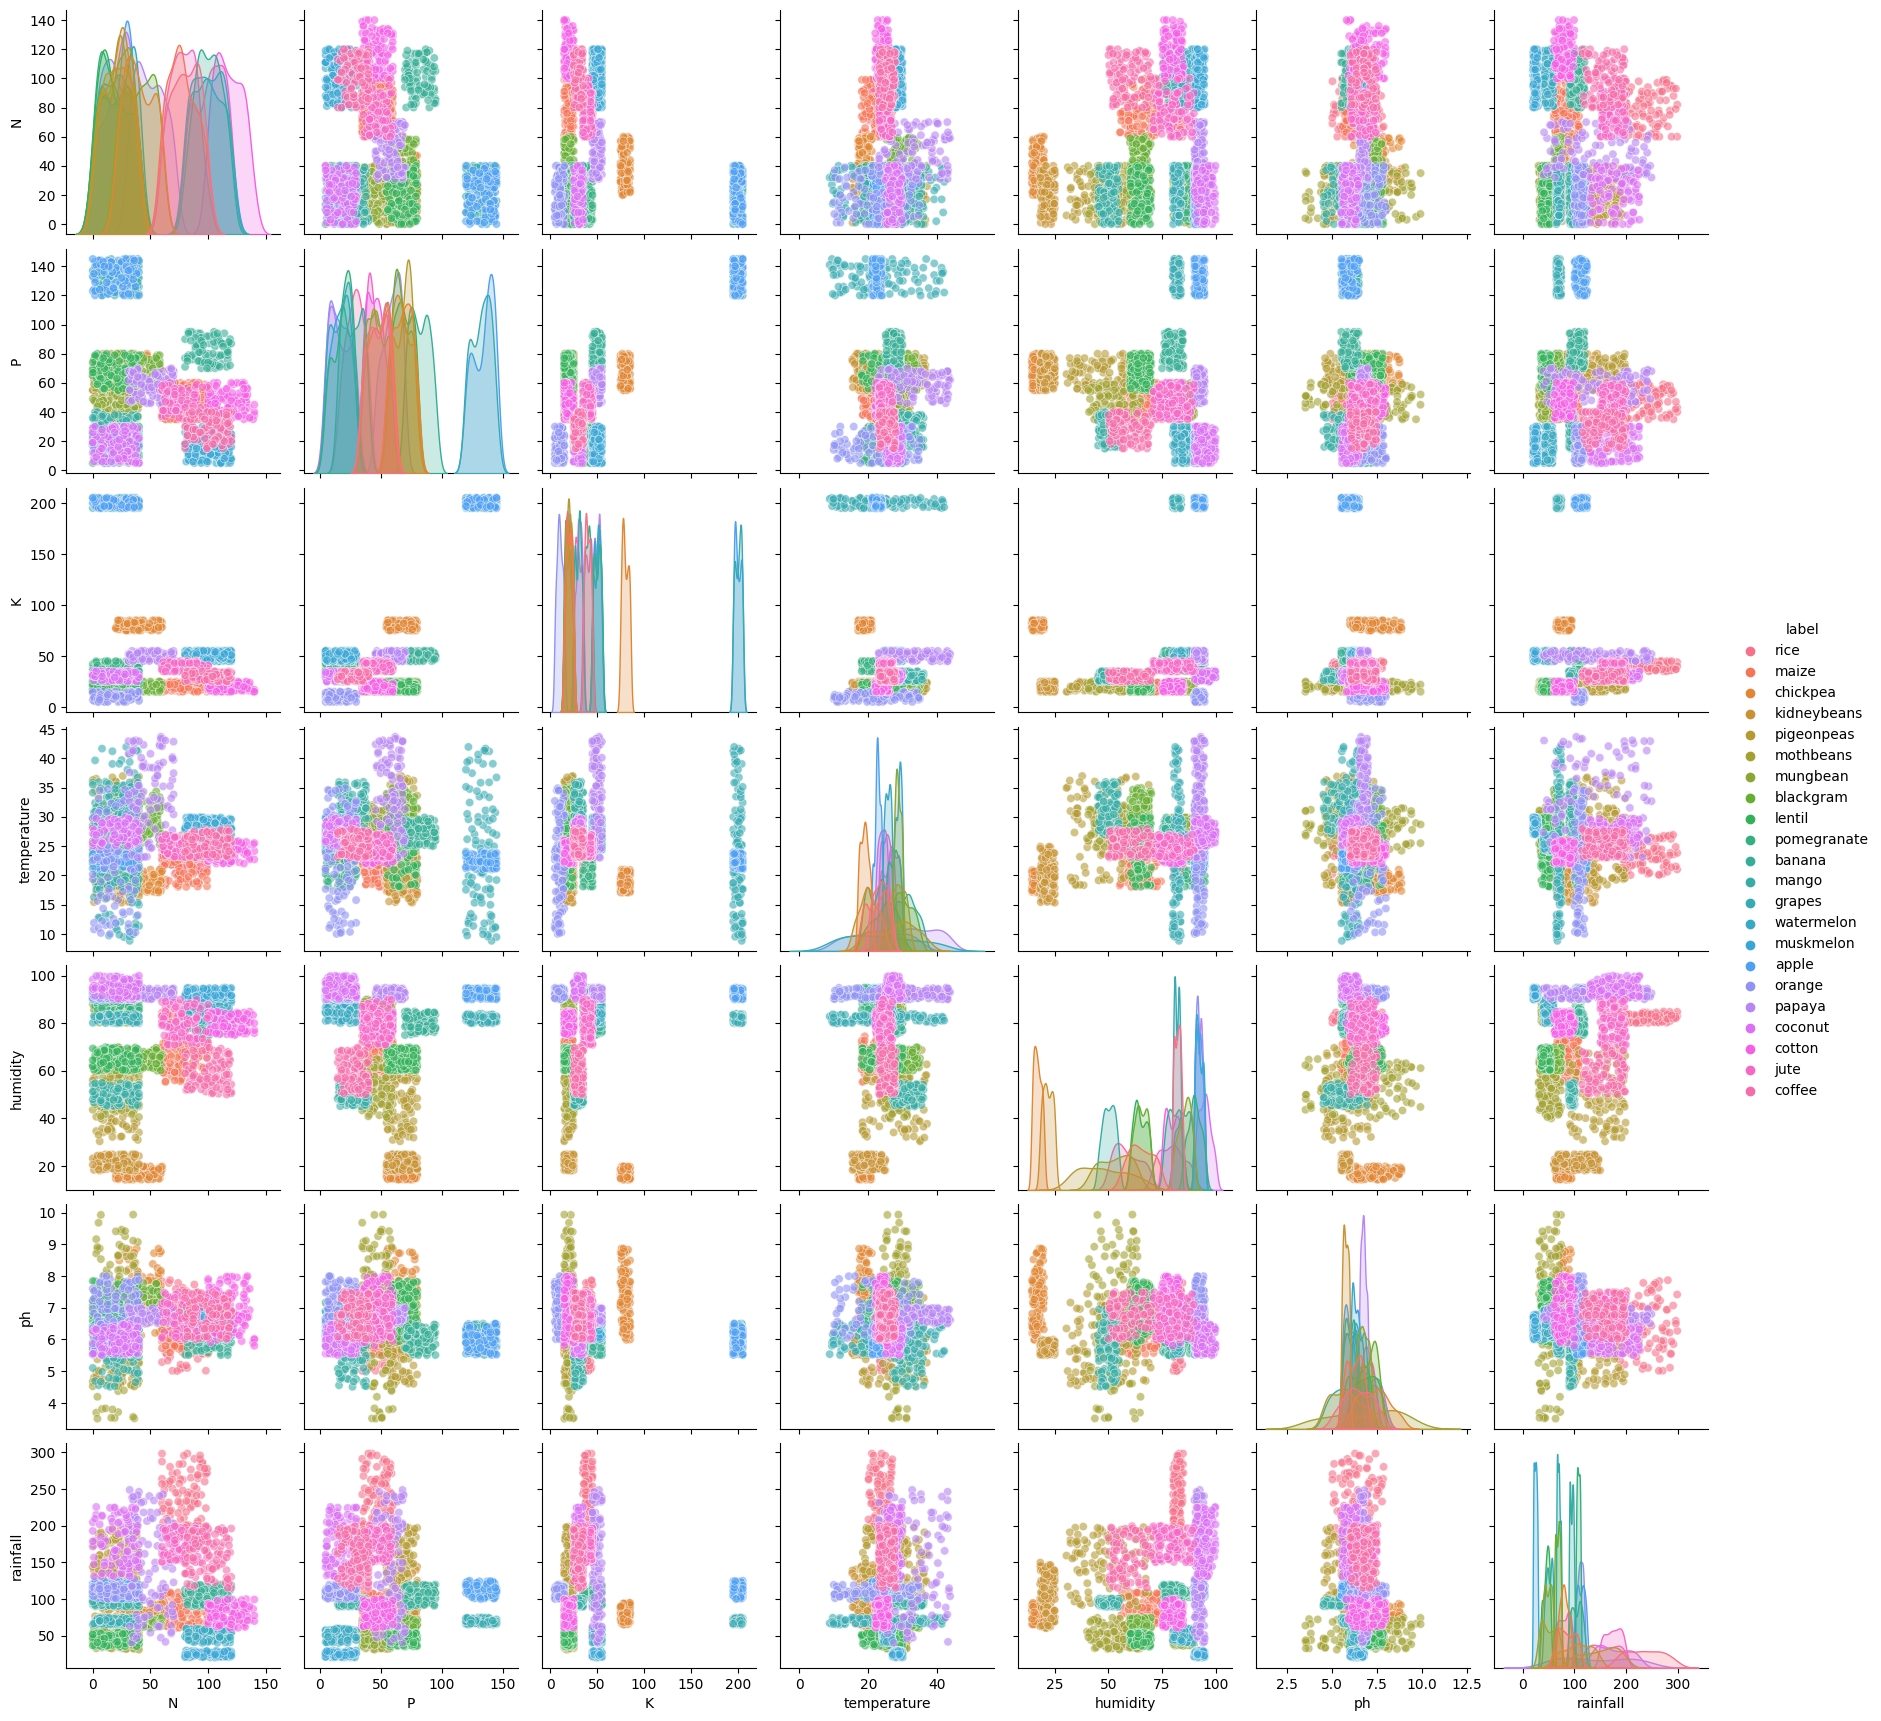

In [17]:
palette = sns.color_palette("husl", 22)  # Generating a color palette for the plots
sns.pairplot(df_crop, diag_kind='kde', plot_kws={'alpha': 0.6} ,hue='label',palette=palette)
plt.show()

In [18]:
df_temp=pd.DataFrame(df_crop.copy())

In [19]:
def find_season(row):
    if row['rainfall'] > 124 and row['temperature'] > 20:
        return 'Monsoon'
    elif row['temperature'] >= 27 and row['rainfall'] <= 124:
        return 'Summer'
    elif (row['temperature'] < 26 and row['humidity'] <= 50) or (row['temperature'] < 20):
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the DataFrame
df_temp['seasons'] = df_temp.apply(find_season, axis=1)


**There are 3 major seasons for crop cultivation in India.**

- **Monsoon Season**: These crops are also known as the Kharif season, Kharif crops are sown at the beginning of the monsoon season, typically from May to October. These crops require a lot of water and hot conditions to grow well.


- **Winter Season**: These crops are also known as Rabi season.Rabi crops are planted after the monsoon season, around October or mid-November, and are harvested in April or                  May. 


- **Summer Season**: These crops are also known as Zaid season.Zaid crops are grown between the Rabi and Kharif seasons, typically from March to June. These crops require warm,                dry weather and mature early.

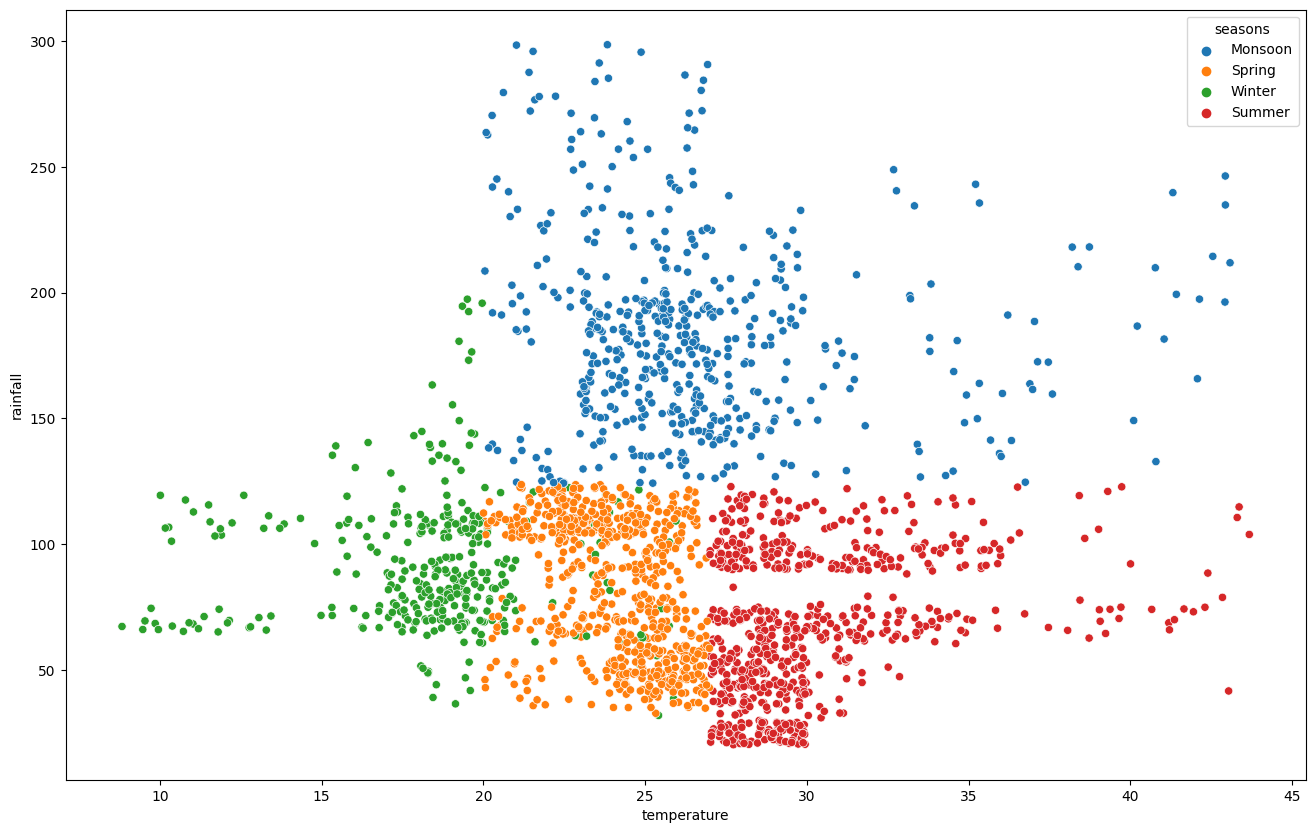

In [20]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_temp , x='temperature',y='rainfall' , hue='seasons')
plt.show()

In [21]:
# print(df_temp.groupby('seasons')['label'].unique())
print('*****'*3,'Monsoon crops','*****'*3,'')
print(df_temp[df_temp['seasons']=='Monsoon']['label'].unique().tolist())
print('\n')
print('*****'*3,'Summer crops','*****'*3)
print(df_temp[df_temp['seasons']=='Summer']['label'].unique().tolist())
print('\n')

print('*****'*3,'Winter crops','*****'*3)
print(df_temp[df_temp['seasons']=='Winter']['label'].unique().tolist())
print('\n')

print('*****'*3,'Spring crops','*****'*3)
print(df_temp[df_temp['seasons']=='Spring']['label'].unique().tolist())

*************** Monsoon crops *************** 
['rice', 'kidneybeans', 'pigeonpeas', 'apple', 'papaya', 'coconut', 'jute', 'coffee']


*************** Summer crops ***************
['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'muskmelon', 'orange', 'papaya', 'coffee']


*************** Winter crops ***************
['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'lentil', 'pomegranate', 'grapes', 'orange']


*************** Spring crops ***************
['maize', 'pigeonpeas', 'mothbeans', 'blackgram', 'lentil', 'pomegranate', 'banana', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'cotton', 'coffee']


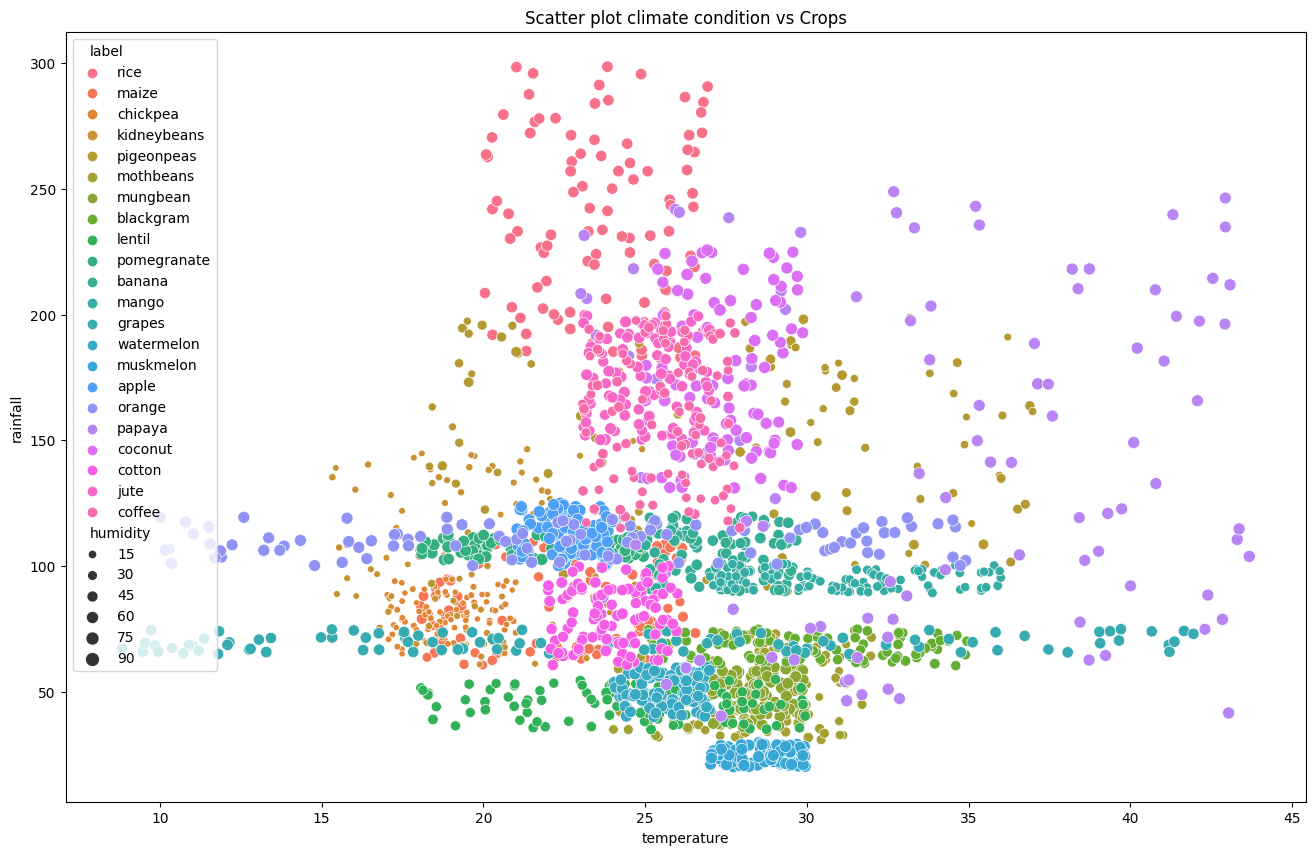

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_crop, x='temperature', y='rainfall', hue='label', size='humidity', sizes=(20, 80))
plt.title('Scatter plot climate condition vs Crops')
plt.show()

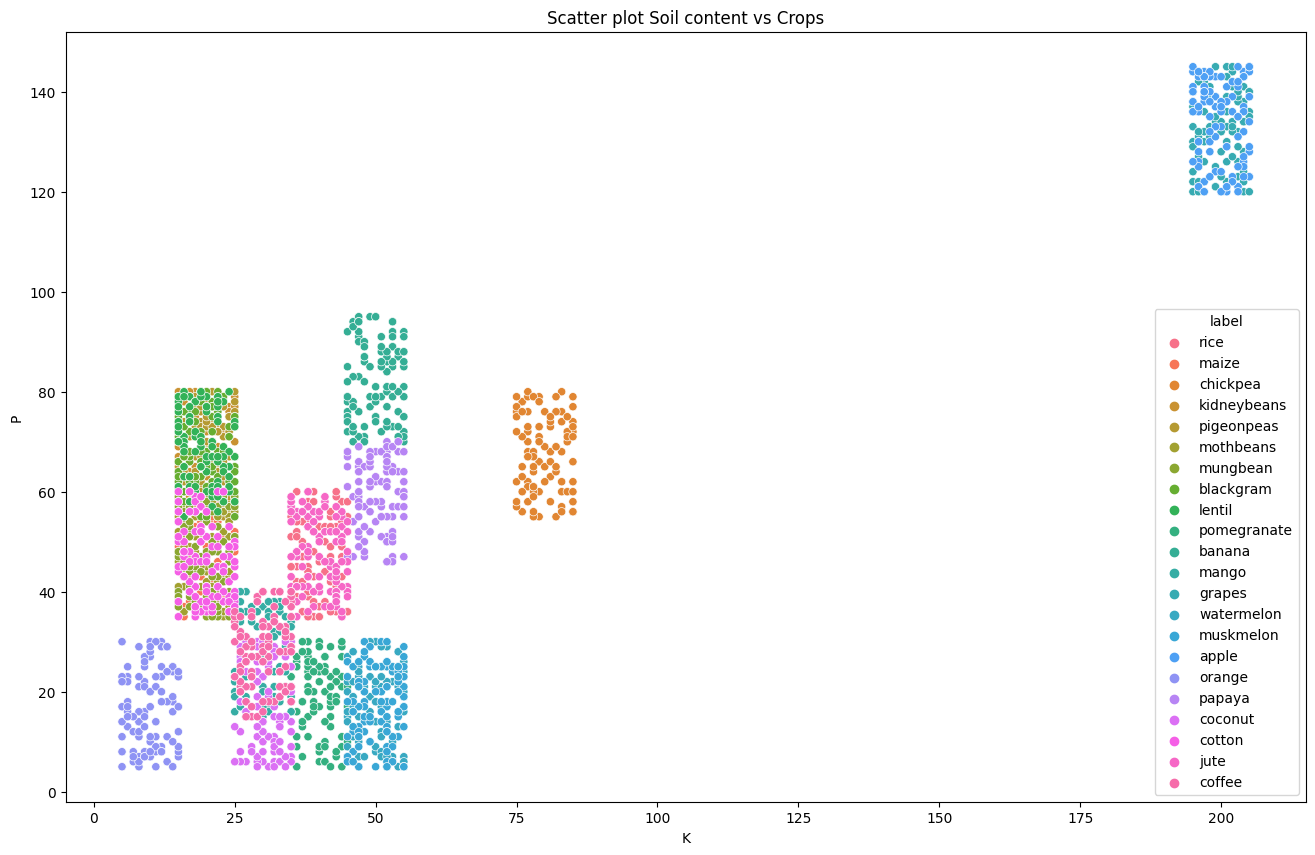

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_crop, x='K', y='P', hue='label')
plt.title('Scatter plot Soil content vs Crops')
plt.show()

**Hypothesis testing**

In [24]:
numerical_vars = ["N", "P", "K", "temperature","humidity", "ph","rainfall"]

for var in numerical_vars:
    f_statistic, p_value = f_oneway(*[group[var] for label, group in df_crop.groupby('label')])
    if p_value > 0.05:
        print(f"As the p-value-{p_value} is greater than alpha (0.05), {var} is less significant to predicting label.\n")
    else:
        print(f"As the p-value-{p_value} is less than alpha (0.05), {var} is highly significant to predicting label.\n")

As the p-value-0.0 is less than alpha (0.05), N is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), P is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), K is highly significant to predicting label.

As the p-value-4.019323818173197e-305 is less than alpha (0.05), temperature is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), humidity is highly significant to predicting label.

As the p-value-6.4931618988390225e-199 is less than alpha (0.05), ph is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), rainfall is highly significant to predicting label.



# MODEL TRANING - Supervised Learning models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,recall_score,precision_score,f1_score
from sklearn import feature_selection

from sklearn.model_selection import GridSearchCV
import pickle

**Train Test Split**

In [26]:
scaler=StandardScaler()
X=df_crop.drop('label',axis=1)
y=df_crop['label']
# X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=40)
# with open('scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)

**1.Logistic Regression**

In [27]:
log_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9651515151515152
recall_score: 0.9609078636108669
precision_score: 0.9648625993767059
f1_score: 0.9619442953565263
              precision    recall  f1-score   support

       apple       0.97      1.00      0.98        32
      banana       1.00      1.00      1.00        30
   blackgram       0.85      0.88      0.87        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       0.92      1.00      0.96        36
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.97      0.91        31
 kidneybeans       1.00      0.93      0.96        29
      lentil       0.92      0.96      0.94        25
       maize       1.00      0.90      0.95        30
       mango       1.00      1.00      1.00        40
   mothbeans       0.83      0.89      0.86        27
    mungbean       1.00      1.00      1.00        34
  

In [28]:
result = pd.DataFrame(data=[['Logistic regression',acc, recall, prec, f1]],
                      columns=['Model','Accuracy', 'Recall', 'Precision', 'F1_score'])

In [29]:
inp=np.array([20,129,206,15,80,5,60])
inp=inp.reshape(1, -1)
ans=log_model.predict(inp)
ans

array(['grapes'], dtype=object)

**2.SGDClassifier**

In [30]:
#gradiat decent
SGD_Model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

In [31]:
SGD_Model.fit(X_train,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [32]:
y_pred=SGD_Model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.706060606060606
recall_score: 0.7032815923098835
precision_score: 0.7696594944768901
f1_score: 0.690144602791304
              precision    recall  f1-score   support

       apple       0.93      0.41      0.57        32
      banana       0.00      0.00      0.00        30
   blackgram       0.00      0.00      0.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.65      0.78        31
      coffee       1.00      0.88      0.94        26
      cotton       1.00      0.67      0.80        36
      grapes       0.67      0.97      0.79        29
        jute       0.72      0.42      0.53        31
 kidneybeans       1.00      0.21      0.34        29
      lentil       0.65      0.96      0.77        25
       maize       0.25      1.00      0.41        30
       mango       1.00      0.88      0.93        40
   mothbeans       0.78      0.67      0.72        27
    mungbean       0.96      0.74      0.83        34
   m

In [33]:
new_row = pd.DataFrame(data=[['SGD', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [34]:
#hyper parameter
Model=LogisticRegression(multi_class='multinomial', max_iter=500)
params={
    'solver':['newton-cg','lbfgs','libliner'],
    'penalty':['l1','l2'],
    'C':[100,10,0.1,0.01]
     }


In [35]:
GS_model=GridSearchCV(estimator=Model,param_grid=params , cv=5 ,scoring='accuracy', n_jobs=-1 )

In [36]:
GS_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'libliner']},
             scoring='accuracy')

In [37]:
print(GS_model.best_estimator_)
GS_model.best_params_

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg')


{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [38]:
gs_pred=GS_model.predict(X_test)

In [39]:
acc=accuracy_score(y_test,gs_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9833333333333333
recall_score: 0.7032815923098835
precision_score: 0.7696594944768901
f1_score: 0.690144602791304
              precision    recall  f1-score   support

       apple       0.93      0.41      0.57        32
      banana       0.00      0.00      0.00        30
   blackgram       0.00      0.00      0.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.65      0.78        31
      coffee       1.00      0.88      0.94        26
      cotton       1.00      0.67      0.80        36
      grapes       0.67      0.97      0.79        29
        jute       0.72      0.42      0.53        31
 kidneybeans       1.00      0.21      0.34        29
      lentil       0.65      0.96      0.77        25
       maize       0.25      1.00      0.41        30
       mango       1.00      0.88      0.93        40
   mothbeans       0.78      0.67      0.72        27
    mungbean       0.96      0.74      0.83        34
   

In [40]:
new_row = pd.DataFrame(data=[['Tunned Logistic', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**3.Naive Bayes**

In [41]:
NaiveBayes = GaussianNB(priors=None, var_smoothing=1e-09)

NaiveBayes.fit(X_train,y_train)

y_pred=NaiveBayes.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

print(classification_report(y_test, y_pred))

accuracy_score: 0.9939393939393939
recall_score: 0.993006993006993
precision_score: 0.9948051948051948
f1_score: 0.9934573002754821
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.89      1.00      0.94        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        34
   

In [42]:
new_row = pd.DataFrame(data=[['Naive bayes', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**4.Decision Tree**

In [43]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

y_pred=DecisionTree.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))
pd.DataFrame({'feature:':df_crop.columns[:-1], 'importance':DecisionTree.feature_importances_})

accuracy_score: 0.9318181818181818
recall_score: 0.9296593829686155
precision_score: 0.9459310422600308
f1_score: 0.9242112490449521
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.63      0.92      0.75        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.85      0.92        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.42      0.59        31
 kidneybeans       1.00      0.86      0.93        29
      lentil       0.93      1.00      0.96        25
       maize       0.80      0.93      0.86        30
       mango       1.00      0.95      0.97        40
   mothbeans       1.00      0.52      0.68        27
    mungbean       1.00      1.00      1.00        34
  

feature:  importance
0            N    0.089676
1            P    0.207711
2            K    0.181853
3  temperature    0.013224
4     humidity    0.343394
5           ph    0.002027
6     rainfall    0.162114

In [44]:
new_row = pd.DataFrame(data=[['Decision Tree', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**5.Random Forest Classifier**

In [45]:
RFC = RandomForestClassifier(n_estimators=20)
RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9939393939393939
recall_score: 0.9933537191601708
precision_score: 0.9936574074074074
f1_score: 0.9934464351778446
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.94      0.97      0.95        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.96      0.98        27
    mungbean       1.00      1.00      1.00        34
  

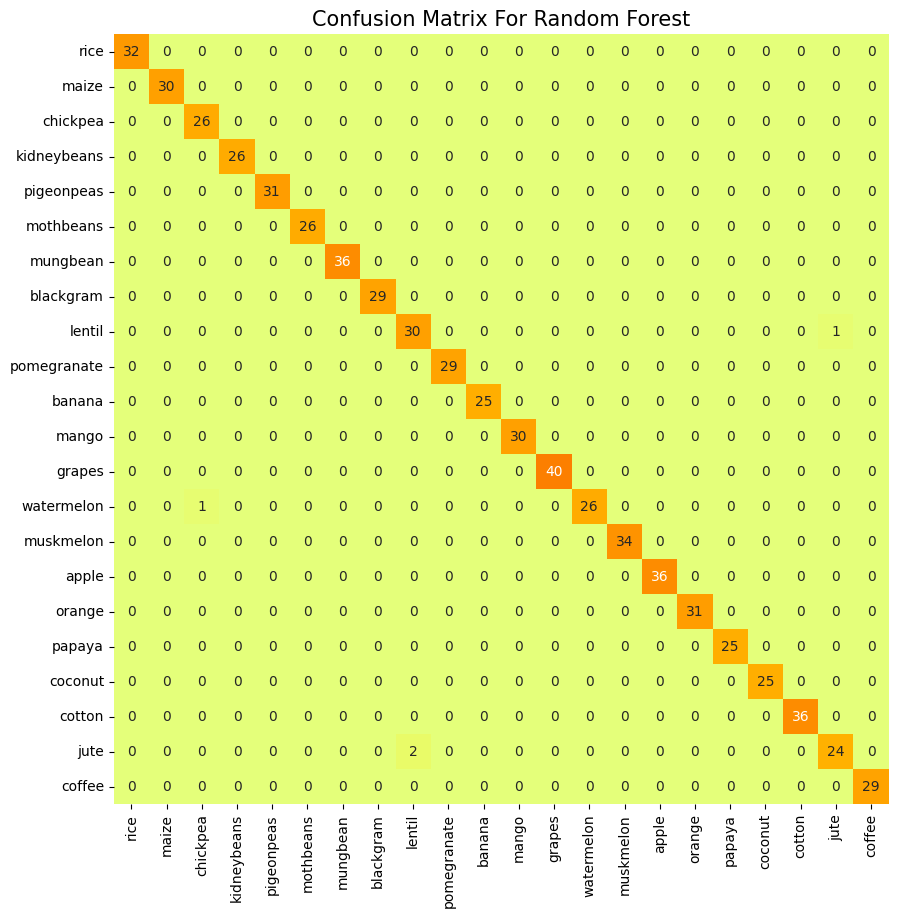

In [46]:
con_matrix=confusion_matrix(y_test,y_pred)
crop=df_crop['label'].unique()
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(con_matrix, annot = True, cmap = 'Wistia',xticklabels=crop,yticklabels=crop , cbar=False , fmt='.0f')
plt.title('Confusion Matrix For Random Forest', fontsize = 15)
plt.show()

In [47]:
new_row = pd.DataFrame(data=[['Random Forest', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**Tuned Decision Tree**

In [48]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

DT = DecisionTreeClassifier(random_state=2)


Tunned_DT = GridSearchCV(estimator=DT, param_grid=params, cv=5, scoring='accuracy')
Tunned_DT.fit(X_train, y_train)
y_pred=Tunned_DT.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9863636363636363
recall_score: 0.9862027686980248
precision_score: 0.9855854920169438
f1_score: 0.9857098789755575
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      0.97      0.99        36
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.94      0.92        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.96      0.98        27
    mungbean       1.00      0.94      0.97        34
  

In [49]:
new_row = pd.DataFrame(data=[['Tunned DT', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**Tuned Random Forest**

In [50]:
param_grid = {
    'n_estimators': [20, 50],           # Number of trees in the forest
    'max_depth': [10],                # Maximum depth of the tree
    'min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],           # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],     # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Tunned_RF = GridSearchCV(estimator=RF, param_grid=params, cv=5, scoring='accuracy',n_jobs=-1)
Tunned_RF=RandomForestClassifier(criterion = 'gini',
 max_depth= 20,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 20)
Tunned_RF.fit(X_train, y_train)
y_pred=Tunned_RF.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9984848484848485
recall_score: 0.9982517482517482
precision_score: 0.9985795454545454
f1_score: 0.9983872336813513
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.97      1.00      0.98        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        34
  

In [52]:
# Tunned_RF.
# {'criterion': 'gini',
#  'max_depth': 20,
#  'max_features': 'log2',
#  'min_samples_leaf': 2,
#  'min_samples_split': 20}

In [53]:
new_row = pd.DataFrame(data=[['Tuned RF', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**6.Bagging**

In [54]:
bagging_model = BaggingClassifier(estimator=Tunned_RF,n_estimators=20)
bagging_model.fit(X_train,y_train)

y_pred=bagging_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

print(classification_report(y_test, y_pred))

accuracy_score: 0.996969696969697
recall_score: 0.9965682465682465
precision_score: 0.9968960437710437
f1_score: 0.996671967815142
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.97      1.00      0.98        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.96      0.98        27
    mungbean       1.00      1.00      1.00        34
   m

In [55]:
new_row = pd.DataFrame(data=[['Bagged RF', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**7.Adaboost**

In [56]:
Ada_model = AdaBoostClassifier(estimator=Tunned_RF,n_estimators=50)
Ada_model.fit(X_train,y_train)

y_pred=Ada_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.996969696969697
recall_score: 0.9965034965034966
precision_score: 0.9972451790633609
f1_score: 0.9967613636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.94      1.00      0.97        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        34
   

In [57]:
new_row = pd.DataFrame(data=[['Adaboost', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**8.Gradient boost**

In [58]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train,y_train)

y_pred=GB_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='macro')
prec=precision_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)
print(classification_report(y_test, y_pred))

accuracy_score: 0.9893939393939394
recall_score: 0.988597683151763
precision_score: 0.9894499837335203
f1_score: 0.9889048272895544
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.94      0.92        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       0.98      1.00      0.99        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      0.97      0.99        34
   

In [59]:
new_row = pd.DataFrame(data=[['Gradient Boost', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**XGBoost**

In [60]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

XB = xgb.XGBClassifier()
XB.fit(X_train,y_train_encoded)

y_pred = XB.predict(X_test)

acc=accuracy_score(y_test_encoded,y_pred)
recall=recall_score(y_test_encoded,y_pred, average='macro')
prec=precision_score(y_test_encoded,y_pred, average='macro')
f1=f1_score(y_test_encoded,y_pred, average='macro')
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

print(classification_report(y_test_encoded, y_pred))

accuracy_score: 0.996969696969697
recall_score: 0.9963636363636365
precision_score: 0.9972078508663874
f1_score: 0.9966872604451219
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        30
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        31
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        30
          12       0.98      1.00      0.99        40
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        34
   

In [61]:
new_row = pd.DataFrame(data=[['XGBoost', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

#  MODEL TRANING - Unsupervised Learning models

In [88]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [89]:
train=df_crop.drop('label',axis=1)
train=train.apply(zscore)

In [91]:
wcss=[]
clusters=range(1,11)
for k in clusters:
    KMC_model=KMeans(n_clusters=k,init = 'k-means++')
    KMC_model.fit(train)
#     prediction=KMC_model.predict(train)
    wcss.append(KMC_model.inertia_)
    
plt.plot(clusters, wcss , 'bx-')
plt.title('Elbow plot')
plt.xlabel('Clusters')
plt.ylabel('SSError')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

In [76]:
# KMC_model=KMeans(n_clusters=5,init = 'k-means++')
# KMC_model.fit(train)
# prediction=KMC_model.predict(train)
# train=train.join(df_crop.label)
# train['clusters']=prediction
# train.head()

In [78]:
# print("Cluster [0] :", train[train['clusters']==0]['label'].unique()) 
# print('\n')
# print("Cluster [1] :", train[train['clusters']==1]['label'].unique())
# print('\n')
# print("Cluster [2] :", train[train['clusters']==2]['label'].unique())
# print('\n')
# print("Cluster [3] :", train[train['clusters']==3]['label'].unique())
# print('\n')
# print("Cluster [4] :", train[train['clusters']==4]['label'].unique())

**DBSCAN**

In [80]:
# from sklearn.cluster import DBSCAN
# dbs=DBSCAN(eps=0.8,min_samples=6)
# dbs.fit(train.drop(['label','clusters'],axis=1))
# train['dbs_clusters']=dbs.labels_
# train.head()

In [ ]:
train['dbs_clusters'].value_counts()

# Finalizing model

In [81]:
result=result.sort_values(by=['Accuracy'],ascending=False)
round(result,3)

Model  Accuracy  Recall  Precision  F1_score
7              Tuned RF     0.998   0.998      0.999     0.998
8             Bagged RF     0.997   0.997      0.997     0.997
9              Adaboost     0.997   0.997      0.997     0.997
11              XGBoost     0.997   0.996      0.997     0.997
3           Naive bayes     0.994   0.993      0.995     0.993
5         Random Forest     0.994   0.993      0.994     0.993
10       Gradient Boost     0.989   0.989      0.989     0.989
6             Tunned DT     0.986   0.986      0.986     0.986
2       Tunned Logistic     0.983   0.703      0.770     0.690
0   Logistic regression     0.965   0.961      0.965     0.962
4         Decision Tree     0.932   0.930      0.946     0.924
1                   SGD     0.706   0.703      0.770     0.690

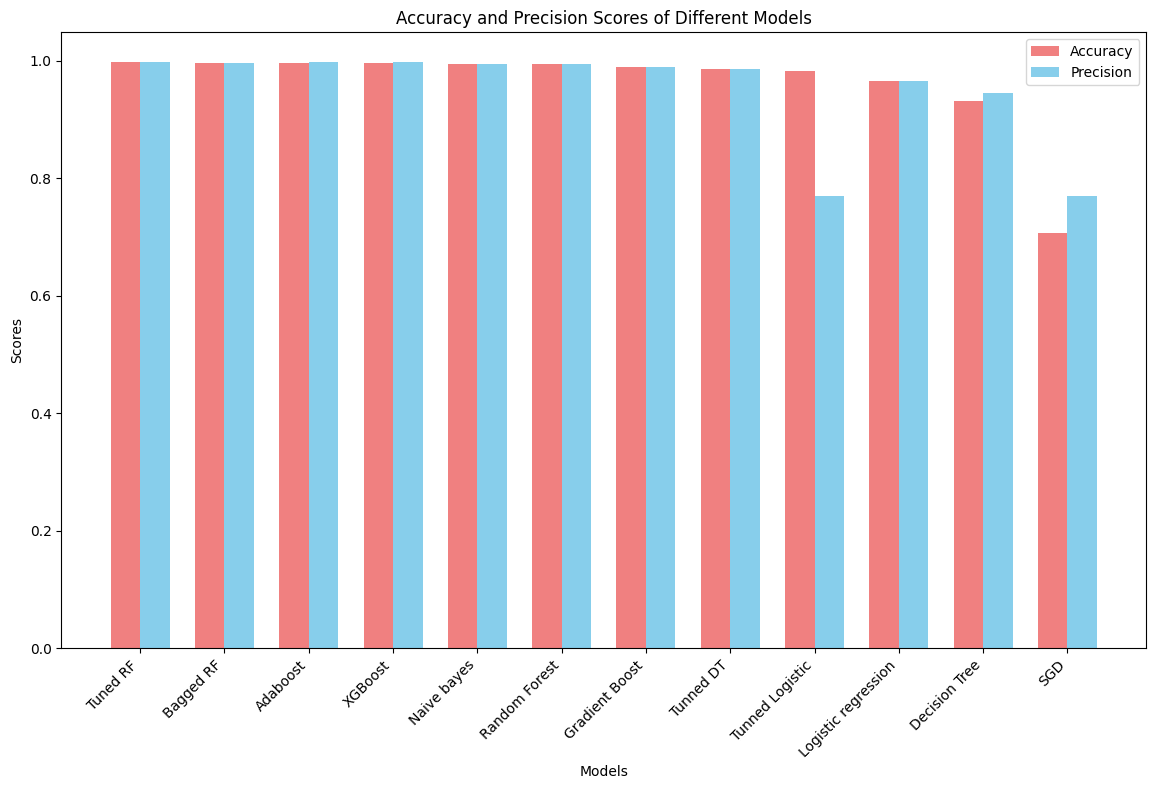

In [82]:
fig, ax = plt.subplots(figsize=(14, 8))

index = np.arange(len(result))
bar_width = 0.35

rects1 = ax.bar(index, result['Accuracy'], bar_width, color='lightcoral', label='Accuracy')
rects2 = ax.bar(index + bar_width, result['Precision'], bar_width, color='skyblue', label='Precision')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision Scores of Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result['Model'], rotation=45, ha='right')
ax.legend()

plt.show()


### Testing with Generated Real world data

In [83]:
test_df=pd.read_csv('synthetic_agricultural_data.csv')
x_test_prod=test_df.drop('label',axis=1)
y_test_prod=test_df['label']

In [84]:
# scaler=StandardScaler()
# x_test=scaler.fit_transform(x_test)

In [86]:
y_pred_prod=Tunned_RF.predict(x_test_prod)
acc=accuracy_score(y_test_prod,y_pred_prod)
acc

0.20045454545454544

# Bagging Random Forest Model is selected as the final model as it performed well with Generated real world condition

In [87]:
inp=np.array([[7,79,23,19.63,19.68,5.82,96.65]])

pred = Tunned_RF.predict(inp)

pred

array(['kidneybeans'], dtype=object)